In [1]:
import cv2     # Thư viện OpenCV
import numpy as np   # Thư viện numy để làm việc dữ liệu kiểu mảng
import matplotlib.pyplot as plt # import thư viện matplotlib để vẽ ảnh

In [2]:
def Tich_chap(img,mask):
    m, n = img.shape
    img_new = np.zeros([m, n])
    for i in range(1, m-1):
        for j in range(1, n-1):
            temp   =  img[i-1, j-1]    * mask[0, 0]\
                   +  img[i, j-1]      * mask[0, 1]\
                   +  img[i+1, j - 1]  * mask[0, 2]\
                   +  img[i-1, j]      * mask[1, 0]\
                   +  img[i, j]        * mask[1, 1]\
                   +  img[i+1, j]      * mask[1, 2]\
                   +  img[i - 1, j+1]  * mask[2, 0]\
                   +  img[i, j + 1]    * mask[2, 1]\
                   +  img[i + 1, j + 1]* mask[2, 2]
            img_new[i, j]= temp
    img_new = img_new.astype(np.uint8)
    return img_new

In [3]:
# Định nghĩa Robert Cross theo hướng chéo 1
loc_Robert_Cross1 = np.array(([0, 0, 0],
                              [0,-1, 0],
                              [0, 0, 1]), dtype="float")

# Định nghĩa Robert Cross theo hướng chéo 2
loc_Robert_Cross2 = np.array(([0, 0, 0],
                              [0, 0,-1],
                              [0, 1, 0]), dtype="float")

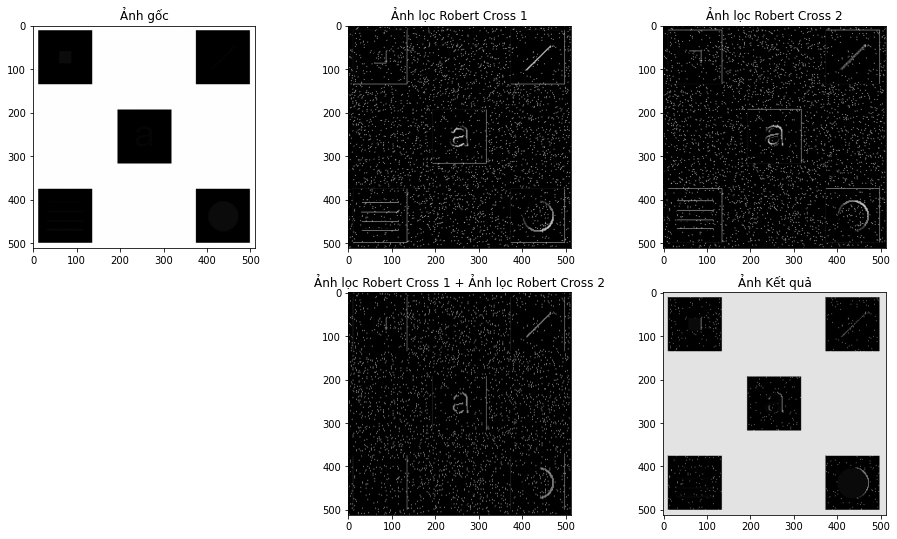

In [9]:
fig = plt.figure(figsize=(16, 9)) # Tạo vùng vẽ tỷ lệ 16:9
(ax1, ax2, ax3), (ax4, ax5, ax6) = fig.subplots(2, 3) # Tạo 6 vùng vẽ con

# Đọc và hiển thị ảnh gốc
image = cv2.imread('/content/test2.tif', 0)
ax1.imshow(image, cmap='gray')
ax1.set_title("Ảnh gốc")

# Lọc Robert Cross theo hướng 1 và hiển thị ảnh
img_Robert_Cross1 = Tich_chap(image, loc_Robert_Cross1) #Gọi hàm tích chập
ax2.imshow(img_Robert_Cross1, cmap='gray')
ax2.set_title("Ảnh lọc Robert Cross 1")

# Lọc Robert Cross theo hướng 2 và hiển thị ảnh
img_Robert_Cross2 = Tich_chap(image, loc_Robert_Cross2) #Gọi hàm tích chập
ax3.imshow(img_Robert_Cross2, cmap='gray')
ax3.set_title("Ảnh lọc Robert Cross 2")

ax4.axis('off')

# Ảnh tổng Robert Cross theo hướng 1 và Robert Cross theo hướng 2 và hiển thị ảnh
img_Robert_Cross12 = img_Robert_Cross1 + img_Robert_Cross2
ax5.imshow(img_Robert_Cross12, cmap='gray')
ax5.set_title("Ảnh lọc Robert Cross 1 + Ảnh lọc Robert Cross 2")

# Ảnh cuối cùng = ảnh gốc + Ảnh tổng Robert Cross theo hướng 1 và Robert Cross
# theo hướng 2 và hiển thị ảnh
img_Robert_Cross12_ketqua = image + img_Robert_Cross12
ax6.imshow(img_Robert_Cross12_ketqua, cmap='gray')
ax6.set_title("Ảnh Kết quả") 

# Hiển thị vùng vẽ
plt.show()